<h1>Insaid-Assignment</h1>
<h2>Name: Krishna Yadav</h2>
I have answered all the question asked in Candidate Expectation when and where</br> required and all the left question were answered in the conclusion section.

#Libraries

In [161]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [193]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import classification_report

#Data Reading and PreProcessing

##Reading data

In [163]:
file = open('/content/drive/MyDrive/Insaid assignment/Data Dictionary.txt')
contents = file.read()
print(contents)

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to anot

In [164]:
data = pd.read_csv('/content/drive/MyDrive/Insaid assignment/Fraud.csv')

##Correlation matrix 

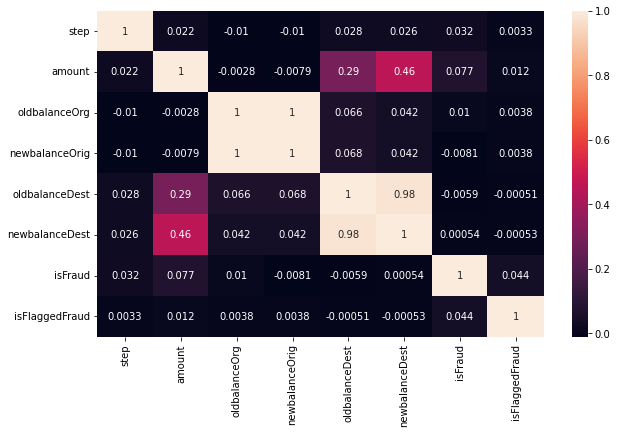

In [165]:
corr=data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)
plt.show()

How did you select variables to be included in the model?

Using the VIF values and correlation heatmap. We just need to check if there are any two attributes highly correlated to each other and then drop the one which is less correlated to the isFraud Attribute.</br>
Variable oldbalanceOrg and newbalanceOrig are highly dependent so we remove newbalanceOrig</br>
Similary, for oldbalanceDest and newbalanceDest are highly dependent so we remove newbalanceDest</br>
We also remove nameOrig and nameDest because these are object type dataset is useless to us

In [166]:
data = data.drop(['nameOrig','nameDest','newbalanceOrig','newbalanceDest'],axis = 1)
#removing unecessary dataset

##Checking for missing value

In [167]:
data.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,21182.0,1,0
4,1,PAYMENT,11668.14,41554.0,0.0,0,0


Checking for missing value

In [168]:
data.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
oldbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [169]:
#no null or missing value

##One Hot Encoding Categorical type data

In [170]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [171]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
data2 = np.array(ct.fit_transform(data))

##Dealing with imbalanced data

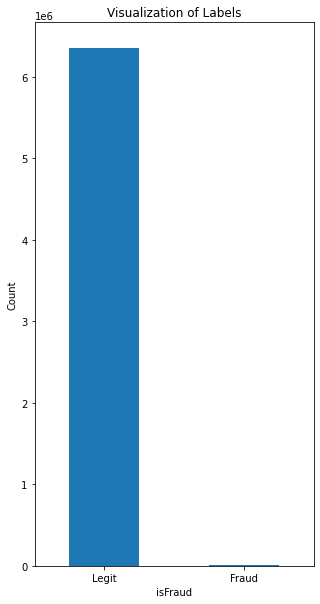

In [172]:
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]
count_classes = data.value_counts(data['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [173]:
data.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,21182.0,1,0
4,1,PAYMENT,11668.14,41554.0,0.0,0,0


In [174]:
data2[0]

array([0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
       1.00000e+00, 9.83964e+03, 1.70136e+05, 0.00000e+00, 0.00000e+00,
       0.00000e+00])

In [175]:
X = np.delete(data2,[9],axis = 1)
print(X[0])

[0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00
 9.83964e+03 1.70136e+05 0.00000e+00 0.00000e+00]


In [176]:
y = data2[:,9] #isFraud

In [177]:
print(f'Number of Zeroes {np.size(y)-np.sum(y)} and Number of Ones {np.sum(y)}')
print(f'Number of zeros {(np.size(y)-np.sum(y))/np.size(y) * 100}')

Number of Zeroes 6354407.0 and Number of Ones 8213.0
Number of zeros 99.87091795518198


We can see the data is highly imbalanced therefore we will apply undersampling

In [178]:
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({0.0: 8213, 1.0: 8213})


##Splitting dataset into training and testing data

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.1, random_state = 42)

#Modelling
Using random forest for classification

Describe your fraud detection model in elaboration.

I have used Random Forset model for classification because of it's high accuracy whne large number of features are present.
Random forest also removes the importance of feature selection.
Also random Forest gave us a high precision value.  In a fraud detection model, Precision is highly important because rather than predicting normal transactions correctly we want Fraud transactions to be predicted correctly and Legit to be left off.If either of the 2 reasons are not fulfiiled we may catch the innocent and leave the culprit.</br></br>
Models like XGBoost, Bagging, ANN, and Logistic Regression may give good accuracy but they won't give good precision and recall values.

In [180]:
X_train[0],y_train[0]

(array([0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.81000000e+02, 3.15474000e+04, 0.00000000e+00,
        1.86551722e+06, 0.00000000e+00]), 0.0)

In [181]:
classifier = RandomForestClassifier(n_estimators=200,criterion ='entropy')

In [182]:
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [189]:
y_pred = classifier.predict(X_test)

Making the confusion matrix

In [190]:
cm = confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.9884357881923311

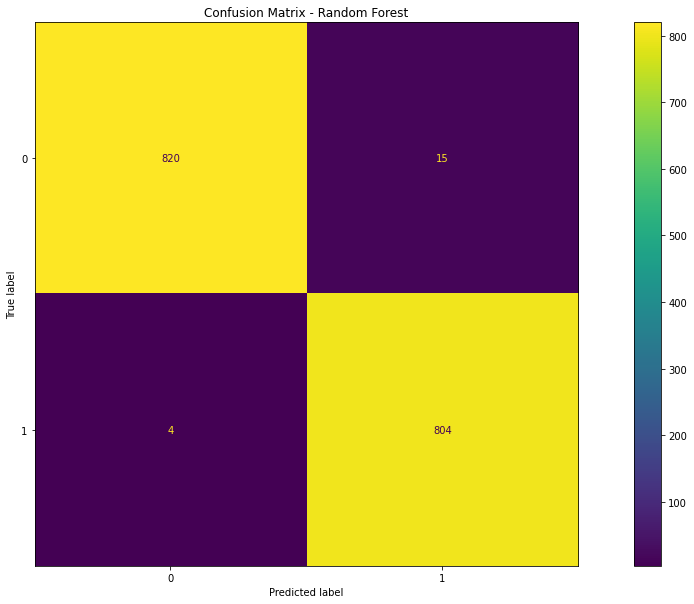

In [191]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.gcf().set_size_inches(20, 10)
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [195]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       824
         1.0       1.00      0.98      0.99       819

    accuracy                           0.99      1643
   macro avg       0.99      0.99      0.99      1643
weighted avg       0.99      0.99      0.99      1643



#Testing our trained model on dataset

In [196]:
y_pred = classifier.predict(X)

In [197]:
print(f'Accuracy is {accuracy_score(y_pred,y)*100}')

Accuracy is 97.55748418104491


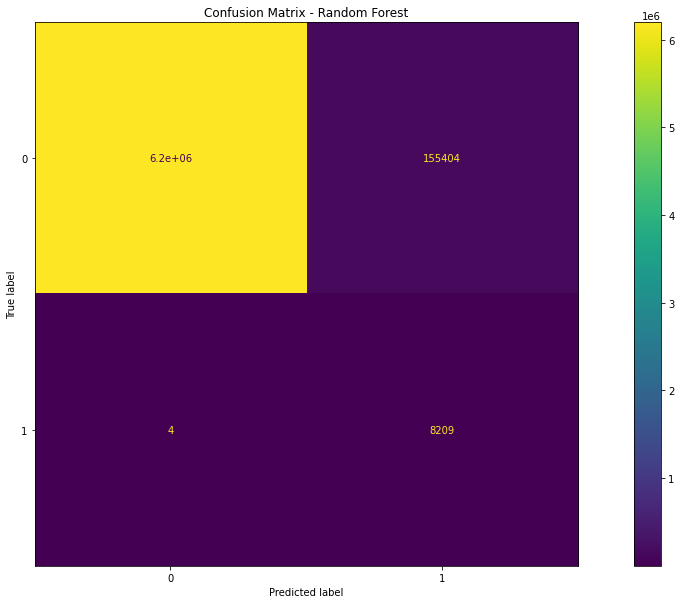

In [198]:
cm = confusion_matrix(y,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.gcf().set_size_inches(20, 10)
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [200]:
print(classification_report(y_pred,y))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99   6199007
         1.0       1.00      0.05      0.10    163613

    accuracy                           0.98   6362620
   macro avg       0.99      0.53      0.54   6362620
weighted avg       0.98      0.98      0.96   6362620



#Conclusion

What are the key factors that predict fraudulent customer?</br>
Do these factors make sense? If yes, How? If not, How not?

1. Abnormal behavior: Unusual actions by a customer, such as multiple transactions in a short time, can indicate fraud.
2. Security: Transactions originating from organisation is secured or not.
3. Transaction history: Analyzing a customer's transaction history, including their purchase patterns and payment methods, can help identify potential fraud.

What kind of prevention should be adopted while company update its infrastructure?
1. Data backup: Back up all data before updating infrastructure to prevent data loss.
2. Network security: Implement security measures such as firewalls and antivirus software to ensure the network is protected during the update.
3. Testing: Test the updated infrastructure in a controlled environment to ensure that it is working correctly and to identify and fix any issues before going live.

Assuming these actions have been implemented, how would you determine if they work?

1. Customer check account immediately after infrastructure is updated.
2. Customers keeping record of their payment logs.
3. Check the newly updated guidelines to make informed decision in future.